In [1]:
import numpy as np
import pandas as pd

In [2]:
train=open('train.txt')

In [3]:
data=train.read()

In [4]:
data=data.split('\n')
data[0]

'i didnt feel humiliated;sadness'

In [5]:
text=[]
emotion=[]
for i in data:
  if len(i)>1:
    x=i.split(';')
    text.append(x[0])
    emotion.append(x[1])


In [6]:
# creating a Pandas DataFrame of text and its emotion

df=pd.DataFrame({'text':text,'emotion':emotion})
df[:8]

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

swl=stopwords.words('english')
swl.remove('no')
swl.remove('not')
swl.remove('nor')


def remove_stopwords(data):             # defining a function to remove stopwords in the text 
    return ' '.join([i for i in data.split() if i.lower() not in swl])      



[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [9]:
def normalization(data):        # defining a funtions to normalize the data, that is converting text into lower case
    return data.lower()

In [10]:
from string import punctuation

def remove_punctuation(data):       # defining a funtion to remove funtuation in text
    return ''.join([i for i in data if i not in punctuation])

In [11]:
def remove_digits(data):            # defining a function to remove digits in the text
    y=''
    for i in data:
        if i.isdigit()==False:
            y=y+i
    return y

In [12]:
!pip install contractions
import contractions                 
def contraction_fixing(data):           # a function to fix the contractions in the text
    return contractions.fix(data)

Defaulting to user installation because normal site-packages is not writeable


In [13]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemmatization(data):                        # a function to lemmetize words in text, i.e converting words in their base form
    lemma=WordNetLemmatizer()
    return lemma.lemmatize(data)

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [14]:
!pip install unidecode
from unidecode import unidecode                 # function to fix accented text
def accented_fixing(data):
    return unidecode(data)

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install autocorrect
from autocorrect import Speller

def auto_correction(data):              # function for autocorrection of words in text
    spell=Speller(lang='en')
    return spell(data)

Defaulting to user installation because normal site-packages is not writeable


In [16]:
# creating a new feature in Dataframe 'df' with all the preprocessing

df['clean_text']=df['text'].apply(remove_digits)

df['clean_text']=df['clean_text'].apply(remove_punctuation)
df['clean_text']=df['clean_text'].apply(accented_fixing)

#df['clean_text']=df['clean_text'].apply(auto_correction)

df['clean_text']=df['clean_text'].apply(contraction_fixing)
df['clean_text']=df['clean_text'].apply(normalization)
df['clean_text']=df['clean_text'].apply(remove_stopwords)
df['clean_text']=df['clean_text'].apply(lemmatization)

In [17]:
df[:7]

,text,emotion,clean_text
0,i didnt feel humiliated,sadness,not feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,feeling little burdened lately not sure
6,ive been taking or milligrams or times recomme...,surprise,taking milligrams times recommended amount fal...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(df.clean_text).A      # converting 'clean_text' data into TFIDF vectors

In [19]:
# creating a dataframe of TF-IDF vectors 

df_v=pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names_out())
df_v

,aa,aaaaaaand,aaaaand,aaaand,aac,aahhh,aaron,ab,abandon,abandoned,...,zonisamide,zoo,zoom,zooming,zooms,zq,zucchini,zum,zumba,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
emotion_convr={'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}

df['emo_enco']=df['emotion'].replace(emotion_convr)         # label encoding of a feature emotions

In [22]:
df[:8]

,text,emotion,clean_text,emo_enco
0,i didnt feel humiliated,sadness,not feel humiliated,0
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,0
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,2
4,i am feeling grouchy,anger,feeling grouchy,1
5,ive been feeling a little burdened lately wasn...,sadness,feeling little burdened lately not sure,0
6,ive been taking or milligrams or times recomme...,surprise,taking milligrams times recommended amount fal...,3
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man,4


In [23]:
x=df_v                      # assigning TFIDF vectors of data to variable 'x'
y=df.emo_enco               # assigning label encoded values of emotions to variable 'y'

In [25]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing data into , testing data size set to 20 %

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7,stratify=y) 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


lr=LogisticRegression()         # creating an instance of Logistic Regression  
lr.fit(x_train,y_train)         # training the model

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
print(classification_report(y_test,lr.predict(x_test)))     # printing the classification report of Logistic Regression model

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       933
           1       0.92      0.74      0.82       432
           2       0.89      0.52      0.66       261
           3       0.84      0.46      0.60       115
           4       0.86      0.72      0.78       387
           5       0.80      0.96      0.87      1072

    accuracy                           0.84      3200
   macro avg       0.86      0.72      0.77      3200
weighted avg       0.85      0.84      0.84      3200



In [30]:
# importing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

rfc=RandomForestClassifier()        # creating an instance of Random forest classifier
rfc.fit(x_train,y_train)            # training the Random forest Classifier

RandomForestClassifier()

In [38]:
# predicting the emotions of testing dataset

y_pred=rfc.predict(x_test) 
y_pred

array([3, 5, 5, ..., 1, 4, 5], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))     # Classification report of Random forest classifier

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       933
           1       0.92      0.84      0.88       432
           2       0.75      0.80      0.78       261
           3       0.81      0.76      0.78       115
           4       0.82      0.85      0.83       387
           5       0.87      0.91      0.89      1072

    accuracy                           0.88      3200
   macro avg       0.85      0.84      0.85      3200
weighted avg       0.88      0.88      0.88      3200



In [35]:
word_doc=[]
for i in df.clean_text:
    for j in i.split():
      word_doc.append(j)
len(word_doc)

148552

In [39]:
from collections import Counter

zxc=Counter(word_doc)
zxc.most_common(10)


[('feel', 11183),
 ('feeling', 5112),
 ('not', 3146),
 ('like', 2908),
 ('really', 942),
 ('know', 865),
 ('time', 794),
 ('get', 740),
 ('little', 736),
 ('would', 717)]

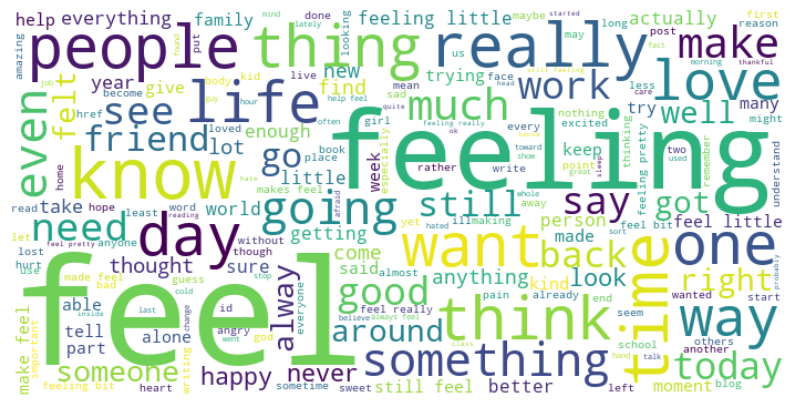

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['clean_text_wc']=df['clean_text'].apply(lambda x: x.split())

# Create a list of words from the 'clean_text' column in your DataFrame
words = []
for sentence in df['clean_text_wc']:
    words.extend(sentence)

# Convert the list of words to a string
text = ' '.join(words)

# Create a WordCloud object
wordcloud = WordCloud(width=700, height=350, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# creating a function to get text input from user and predict its emotion

def rfc_predict(x):
    x=remove_digits(x)
    x=remove_punctuation(x)
    x=accented_fixing(x)
    x=contraction_fixing(x)
    x=normalization(x)
    x=remove_stopwords(x)
    x=lemmatization(x)
    
    emotion_label= {0: 'sadness', 1: 'anger', 2: 'love', 3: 'surprise', 4: 'fear', 5: 'joy'}
    
    xx=tfidf_vect.transform([x]).A
    result=rfc.predict(xx)
    return emotion_label[int(result)]


In [ ]:
# Testing rfc classifier on random text

rfc_predict('I am afraid')


'fear'

In [ ]:
rfc_predict('this is cool')

'joy'

In [ ]:
rfc_predict('so boring')

'sadness'

In [ ]:
"""
import pickle

# machine learning model object
model = rfc

# Saving the model to a pickle file
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

"""

In [41]:
"""
# saving TFIDF vectorizer to disk
import pickle

with open('tfidf_vect.pickle', 'wb') as f:
    pickle.dump(tfidf_vect, f)
"""